 <font color='Green' size="6"> Lending Club Case Study Notebook</font>

### What is Lending Club?
Lending Club is a marketplace for personal loans that matches borrowers who are seeking a loan with investors looking to lend money and make a return.


#### When the company receives a loan application, the company has to make a decision for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:

* If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company

* If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company


### Goal
the company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilize this knowledge for its portfolio and risk assessment. 


# 

 <font color='red' size="6"> Importing all the required libraries</font>

In [2]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

#### Removing warnings as this warnings can be due to difference in versions

In [3]:
import warnings
warnings.filterwarnings('ignore')

### loading dataset

In [4]:
df=pd.read_csv('loan.csv')
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [5]:
df.shape

(39717, 111)

# 

<font color='red' size="6"> Data Cleaning </font>

## 1. Finding missing values

In [6]:
df.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

## 2. dropping columns with missing values

In [7]:
df.dropna(axis=1, how = 'all',  inplace= True)

In [8]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,Jun-16,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


## 3. finding columns with only one unique value and removing them

In [9]:
df.nunique().sort_values(ascending=True)

tax_liens                         1
delinq_amnt                       1
chargeoff_within_12_mths          1
acc_now_delinq                    1
application_type                  1
policy_code                       1
collections_12_mths_ex_med        1
pymnt_plan                        1
initial_list_status               1
term                              2
next_pymnt_d                      2
pub_rec_bankruptcies              3
loan_status                       3
verification_status               3
pub_rec                           5
home_ownership                    5
grade                             7
inq_last_6mths                    9
emp_length                       11
delinq_2yrs                      11
purpose                          14
sub_grade                        35
open_acc                         40
addr_state                       50
issue_d                          55
total_acc                        82
mths_since_last_delinq           95
last_pymnt_d                

In [10]:
df= df.loc[: , df.nunique()> 1]
df.nunique().sort_values(ascending=True)

next_pymnt_d                   2
term                           2
pub_rec_bankruptcies           3
loan_status                    3
verification_status            3
home_ownership                 5
pub_rec                        5
grade                          7
inq_last_6mths                 9
emp_length                    11
delinq_2yrs                   11
purpose                       14
sub_grade                     35
open_acc                      40
addr_state                    50
issue_d                       55
total_acc                     82
mths_since_last_delinq        95
last_pymnt_d                 101
last_credit_pull_d           106
mths_since_last_record       111
int_rate                     371
earliest_cr_line             526
zip_code                     823
loan_amnt                    885
funded_amnt                 1041
revol_util                  1089
out_prncp                   1137
out_prncp_inv               1138
total_rec_late_fee          1356
collection

## 4. Keeping only the neccesary columns which are relevant for our analysis

In [11]:
df= df.loc[: , ['loan_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment',
       'grade', 'sub_grade', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'dti',
       'earliest_cr_line', 'open_acc', 'pub_rec', 'total_acc']]
df.head()

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,dti,earliest_cr_line,open_acc,pub_rec,total_acc
0,5000,4975.0,36 months,10.65%,162.87,B,B2,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,27.65,Jan-85,3,0,9
1,2500,2500.0,60 months,15.27%,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,1.00,Apr-99,3,0,4
2,2400,2400.0,36 months,15.96%,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,8.72,Nov-01,2,0,10
3,10000,10000.0,36 months,13.49%,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,20.00,Feb-96,10,0,37
4,3000,3000.0,60 months,12.69%,67.79,B,B5,1 year,RENT,80000.0,Source Verified,Dec-11,Current,other,17.94,Jan-96,15,0,38


In [12]:
df.isnull().sum()

loan_amnt                 0
funded_amnt_inv           0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
emp_length             1075
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
dti                       0
earliest_cr_line          0
open_acc                  0
pub_rec                   0
total_acc                 0
dtype: int64

### emp_length has some missing values. 
##### we shall check them and decide whether to use mode for missing values or remove them

In [13]:
df.emp_length.value_counts()

10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: emp_length, dtype: int64

In [14]:
df.emp_length.mode()[0]

'10+ years'

### for emp_length, we find that mode can be used to replace the null value

In [15]:
df.emp_length = df.emp_length.fillna(df.emp_length.mode()[0])
df.isnull().sum()

loan_amnt              0
funded_amnt_inv        0
term                   0
int_rate               0
installment            0
grade                  0
sub_grade              0
emp_length             0
home_ownership         0
annual_inc             0
verification_status    0
issue_d                0
loan_status            0
purpose                0
dti                    0
earliest_cr_line       0
open_acc               0
pub_rec                0
total_acc              0
dtype: int64

### for emp_length, we find that mode can be used to replace the null value since the missing null value is not much and changing it with mode won't effect our analysis by much.

### all the missing values is fixed or removed so that it doesn't effect our analysis

## 5. finding duplicate values and removing them.

In [16]:
df.shape

(39717, 19)

In [17]:
df = df.drop_duplicates()
df.shape

(39717, 19)

#### no duplicates found in the dataframe.

# 

<font color='red' size="6"> Standardize the columns  </font>

### While inspecting the columns we found that there are certain columns which needs to be standardize or we can create more columns from them. such columns are:

#### 1. term -  we can remove the months from term column
#### 2. int_rate-  remove % sign from the column
#### 3. emp_length - (< 1 year) is assumed as 0 and 10+ years is assumed as 10
#### 4. issue_d - converting into date format and deriving new columns such as year and month
#### 5. loan_status -current value in loan status is of no use for us so we will remove that.

In [18]:
df.term = df.term.apply(lambda x: x[0:3] if x.endswith("months") else x).astype('int64')
df.head()

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,dti,earliest_cr_line,open_acc,pub_rec,total_acc
0,5000,4975.0,36,10.65%,162.87,B,B2,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,27.65,Jan-85,3,0,9
1,2500,2500.0,60,15.27%,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,1.00,Apr-99,3,0,4
2,2400,2400.0,36,15.96%,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,8.72,Nov-01,2,0,10
3,10000,10000.0,36,13.49%,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,20.00,Feb-96,10,0,37
4,3000,3000.0,60,12.69%,67.79,B,B5,1 year,RENT,80000.0,Source Verified,Dec-11,Current,other,17.94,Jan-96,15,0,38


### applying condition to remove '%' from int_rate column

In [19]:
df.int_rate = df.int_rate.apply(lambda x: x.replace('%','')).astype('float')
df.head()

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,dti,earliest_cr_line,open_acc,pub_rec,total_acc
0,5000,4975.0,36,10.65,162.87,B,B2,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,27.65,Jan-85,3,0,9
1,2500,2500.0,60,15.27,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,1.00,Apr-99,3,0,4
2,2400,2400.0,36,15.96,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,8.72,Nov-01,2,0,10
3,10000,10000.0,36,13.49,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,20.00,Feb-96,10,0,37
4,3000,3000.0,60,12.69,67.79,B,B5,1 year,RENT,80000.0,Source Verified,Dec-11,Current,other,17.94,Jan-96,15,0,38


In [20]:
df.emp_length.value_counts()

10+ years    9954
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: emp_length, dtype: int64

### applying condition to convert < 1 year to 0 and 10+ year to 10 and removing 'year' from each row

In [21]:
df.emp_length = df.emp_length.apply(lambda x: 0 if '<' in x else x[0:2]).astype('int64')
df.emp_length.value_counts()

10    9954
0     4583
2     4388
3     4095
4     3436
5     3282
1     3240
6     2229
7     1773
8     1479
9     1258
Name: emp_length, dtype: int64

In [22]:
df.head()

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,dti,earliest_cr_line,open_acc,pub_rec,total_acc
0,5000,4975.0,36,10.65,162.87,B,B2,10,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,27.65,Jan-85,3,0,9
1,2500,2500.0,60,15.27,59.83,C,C4,0,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,1.00,Apr-99,3,0,4
2,2400,2400.0,36,15.96,84.33,C,C5,10,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,8.72,Nov-01,2,0,10
3,10000,10000.0,36,13.49,339.31,C,C1,10,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,20.00,Feb-96,10,0,37
4,3000,3000.0,60,12.69,67.79,B,B5,1,RENT,80000.0,Source Verified,Dec-11,Current,other,17.94,Jan-96,15,0,38


### convert issue_d column from month-00 to 'year-month-date' format

In [23]:
df.issue_d = pd.to_datetime(df.issue_d,format='%b-%y')
df.head()

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,dti,earliest_cr_line,open_acc,pub_rec,total_acc
0,5000,4975.0,36,10.65,162.87,B,B2,10,RENT,24000.0,Verified,2011-12-01,Fully Paid,credit_card,27.65,Jan-85,3,0,9
1,2500,2500.0,60,15.27,59.83,C,C4,0,RENT,30000.0,Source Verified,2011-12-01,Charged Off,car,1.00,Apr-99,3,0,4
2,2400,2400.0,36,15.96,84.33,C,C5,10,RENT,12252.0,Not Verified,2011-12-01,Fully Paid,small_business,8.72,Nov-01,2,0,10
3,10000,10000.0,36,13.49,339.31,C,C1,10,RENT,49200.0,Source Verified,2011-12-01,Fully Paid,other,20.00,Feb-96,10,0,37
4,3000,3000.0,60,12.69,67.79,B,B5,1,RENT,80000.0,Source Verified,2011-12-01,Current,other,17.94,Jan-96,15,0,38


### creating new columns issue_year and issue_month

In [24]:
df['issue_year']= pd.DatetimeIndex(df['issue_d']).year
df['issue_month']= pd.DatetimeIndex(df['issue_d']).month
df.head()

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,...,issue_d,loan_status,purpose,dti,earliest_cr_line,open_acc,pub_rec,total_acc,issue_year,issue_month
0,5000,4975.0,36,10.65,162.87,B,B2,10,RENT,24000.0,...,2011-12-01,Fully Paid,credit_card,27.65,Jan-85,3,0,9,2011,12
1,2500,2500.0,60,15.27,59.83,C,C4,0,RENT,30000.0,...,2011-12-01,Charged Off,car,1.00,Apr-99,3,0,4,2011,12
2,2400,2400.0,36,15.96,84.33,C,C5,10,RENT,12252.0,...,2011-12-01,Fully Paid,small_business,8.72,Nov-01,2,0,10,2011,12
3,10000,10000.0,36,13.49,339.31,C,C1,10,RENT,49200.0,...,2011-12-01,Fully Paid,other,20.00,Feb-96,10,0,37,2011,12
4,3000,3000.0,60,12.69,67.79,B,B5,1,RENT,80000.0,...,2011-12-01,Current,other,17.94,Jan-96,15,0,38,2011,12


In [25]:
df = df[df.loan_status != 'Current']
df.loan_status = df.loan_status.apply(lambda x: 0 if x == 'Fully Paid' else 1).astype('int64')
df.loan_status.value_counts()

0    32950
1     5627
Name: loan_status, dtype: int64

### 'Current' value is removed and fully paid and charged off is converted into numeric values 

# 

<font color='red' size="6"> Outlier treatment </font>

### we will check the numerical columns using boxplot if there are outlier and if there is, we will remove them.

<AxesSubplot:xlabel='loan_amnt'>

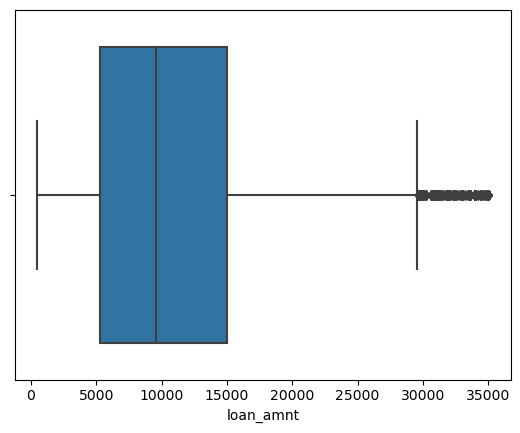

In [26]:
sns.boxplot(df.loan_amnt)

In [27]:
df.loan_amnt.quantile([0.25, 0.75, 0.90,0.95,0.97, 0.99])

0.25     5300.0
0.75    15000.0
0.90    21600.0
0.95    25000.0
0.97    28000.0
0.99    35000.0
Name: loan_amnt, dtype: float64

#### Though there are some values far from distribution, the distribution is pretty continousand there is no need to remove outliers / extreme values.

<AxesSubplot:xlabel='funded_amnt_inv'>

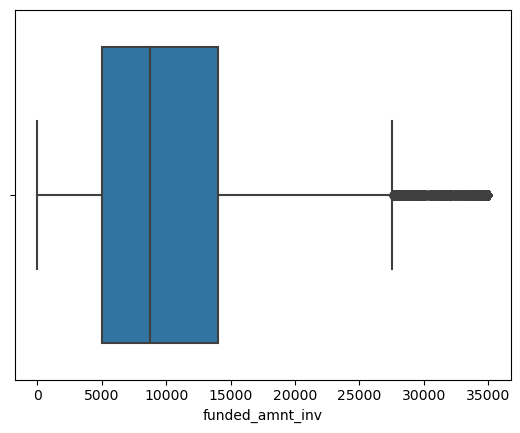

In [28]:
sns.boxplot(df.funded_amnt_inv)

In [29]:
df.funded_amnt_inv.quantile([0.25, 0.75, 0.90,0.95,0.97, 0.99])

0.25     5000.000000
0.75    14000.000000
0.90    19975.000000
0.95    24500.066590
0.97    25750.000000
0.99    34715.012285
Name: funded_amnt_inv, dtype: float64

#### Though there are some values far from distribution, the distribution is pretty continousand there is no need to remove outliers / extreme values.

<AxesSubplot:xlabel='int_rate'>

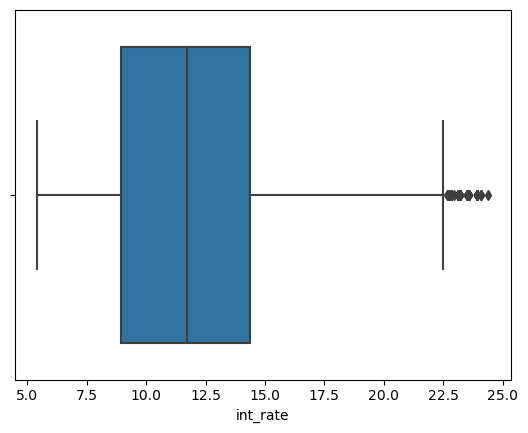

In [30]:
sns.boxplot(df.int_rate)

In [31]:
df.int_rate.quantile([0.25, 0.75, 0.90,0.95,0.97, 0.99])

0.25     8.940
0.75    14.380
0.90    16.820
0.95    18.312
0.97    19.290
0.99    20.990
Name: int_rate, dtype: float64

#### the distribution is pretty continousand there is no need to remove outliers / extreme values.

<AxesSubplot:xlabel='annual_inc'>

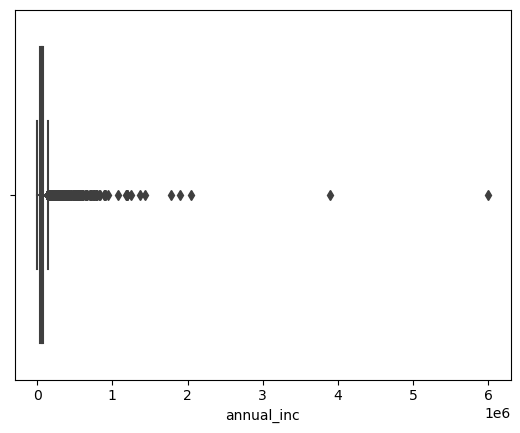

In [32]:
sns.boxplot(df.annual_inc)

In [33]:
df.annual_inc.quantile([0.25, 0.75, 0.90,0.95,0.97, 0.99])

0.25     40000.0
0.75     82000.0
0.90    115000.0
0.95    140004.0
0.97    165000.0
0.99    234144.0
Name: annual_inc, dtype: float64

In [34]:
df= df[df.annual_inc <= df.annual_inc.quantile(0.95)]

#### we found that 99th percentile value was much larger than 95th percentile. hence, we removed the outlier

<AxesSubplot:xlabel='dti'>

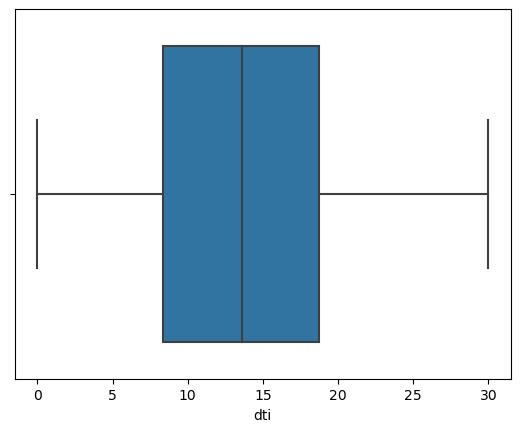

In [35]:
sns.boxplot(df.dti)

#### no outlier here

## we have cleaned the data, removed outliers, dealth with missing values.
## now we will begin our analysis.

# 

<font color='red' size="6"> Univariate Analysis </font>

In [36]:
df.head()

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,...,issue_d,loan_status,purpose,dti,earliest_cr_line,open_acc,pub_rec,total_acc,issue_year,issue_month
0,5000,4975.0,36,10.65,162.87,B,B2,10,RENT,24000.0,...,2011-12-01,0,credit_card,27.65,Jan-85,3,0,9,2011,12
1,2500,2500.0,60,15.27,59.83,C,C4,0,RENT,30000.0,...,2011-12-01,1,car,1.00,Apr-99,3,0,4,2011,12
2,2400,2400.0,36,15.96,84.33,C,C5,10,RENT,12252.0,...,2011-12-01,0,small_business,8.72,Nov-01,2,0,10,2011,12
3,10000,10000.0,36,13.49,339.31,C,C1,10,RENT,49200.0,...,2011-12-01,0,other,20.00,Feb-96,10,0,37,2011,12
5,5000,5000.0,36,7.90,156.46,A,A4,3,RENT,36000.0,...,2011-12-01,0,wedding,11.20,Nov-04,9,0,12,2011,12


Text(0.5, 1.0, 'loan status')

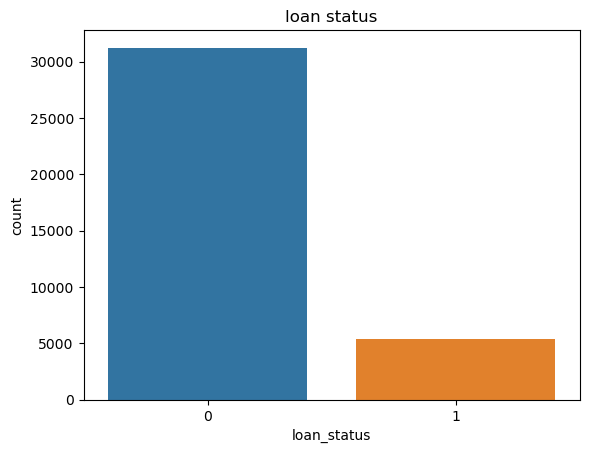

In [37]:
sns.countplot(df.loan_status)
plt.title('loan status')

In [38]:
(df.loan_status.value_counts()*100/df.loan_status.count()).round(1)


0    85.2
1    14.8
Name: loan_status, dtype: float64

#### inference: the defaulter rate is 14.8%

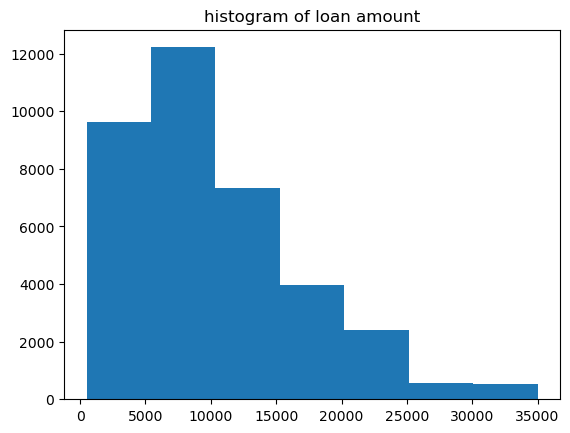

In [39]:
plt.hist(df.loan_amnt, bins=7)
plt.title('histogram of loan amount')
plt.show()

In [40]:
df.loan_amnt.describe()

count    36654.000000
mean     10682.249550
std       7048.414166
min        500.000000
25%       5000.000000
50%       9250.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

#### inference: loan amnt varies from 500 to 35000 and the mean is 10682 and 75% of loan is within 15000

In [41]:
df.term.value_counts()

36    27721
60     8933
Name: term, dtype: int64

In [42]:
(df.term.value_counts()*100/df.term.count()).round(1)

36    75.6
60    24.4
Name: term, dtype: float64

#### inference: the 36 month term is 3 times more than 60 months. meaning people generally take loans for shorter duration


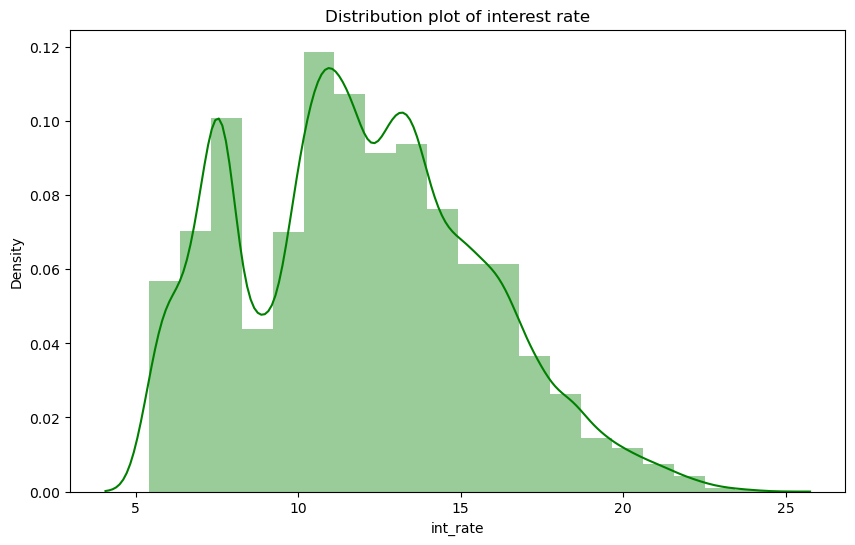

In [43]:
plt.figure(figsize=[10,6])
sns.distplot(df.int_rate, bins=20, color='green')
plt.title('Distribution plot of interest rate')
plt.show()

#### inference: the interest rate is more crowded around 6-8 and 10-15.

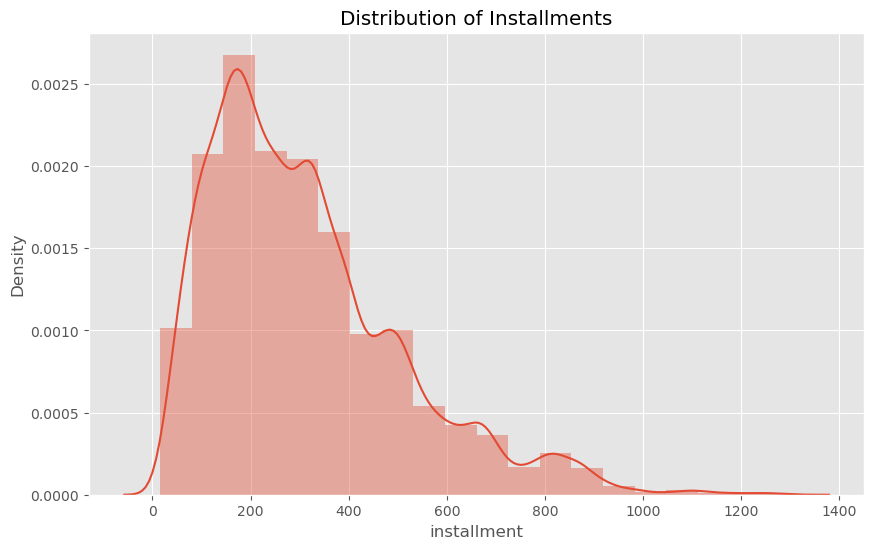

In [75]:
plt.figure(figsize=[10,6])
sns.distplot(df.installment, bins=20)
plt.title('Distribution of Installments')
plt.show()

#### inference: the maximum of installments are between 50 to 400

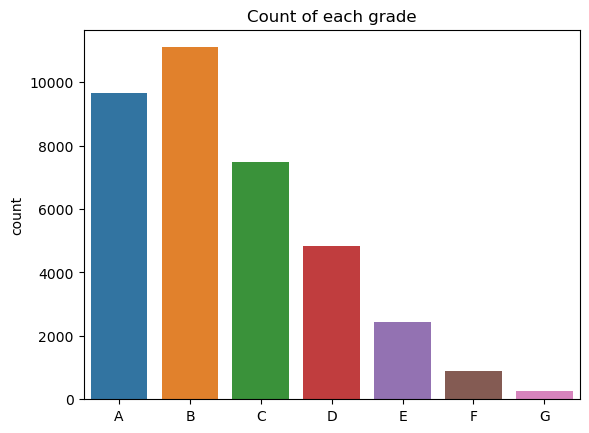

In [45]:
sns.countplot(x=sorted(df.grade))
plt.title('Count of each grade')
plt.show()

#### inference: A large amount of grades are A and B compared to rest.

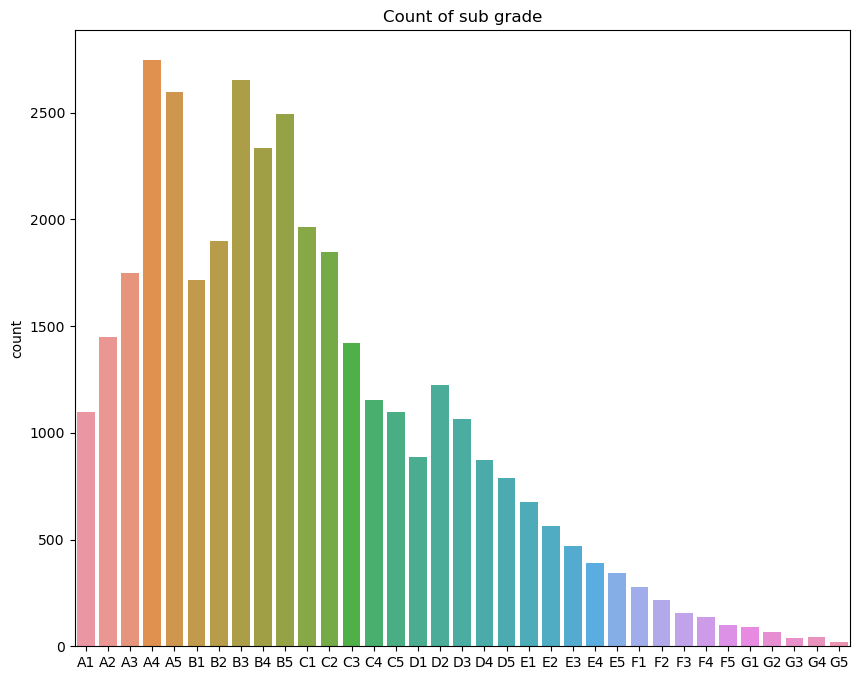

In [46]:
plt.figure(figsize=[10,8])
sns.countplot(sorted(df.sub_grade))
plt.title('Count of sub grade')
plt.show()

#### inference: mostly the sub grades are A to C. 

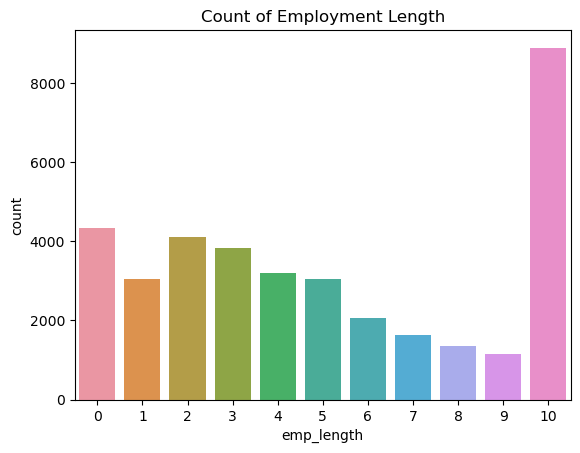

In [47]:
sns.countplot(df.emp_length)
plt.title('Count of Employment Length')
plt.show()

#### inference: most of the loan borrowers have working experience of more or equal to 10 years

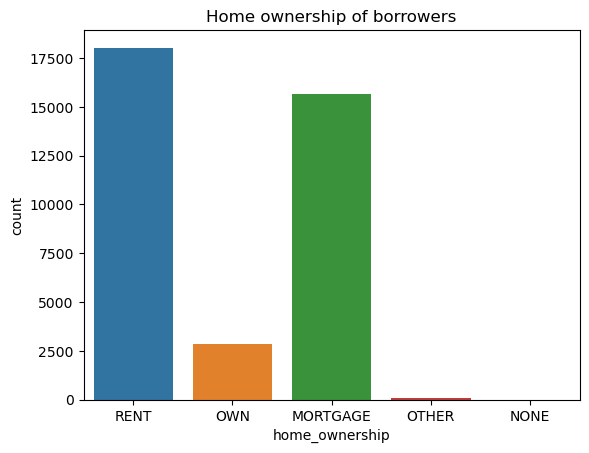

In [48]:
sns.countplot(df.home_ownership)
plt.title('Home ownership of borrowers')
plt.show()

#### inference: most of the loan borrowers are either paying rent or have mortgage

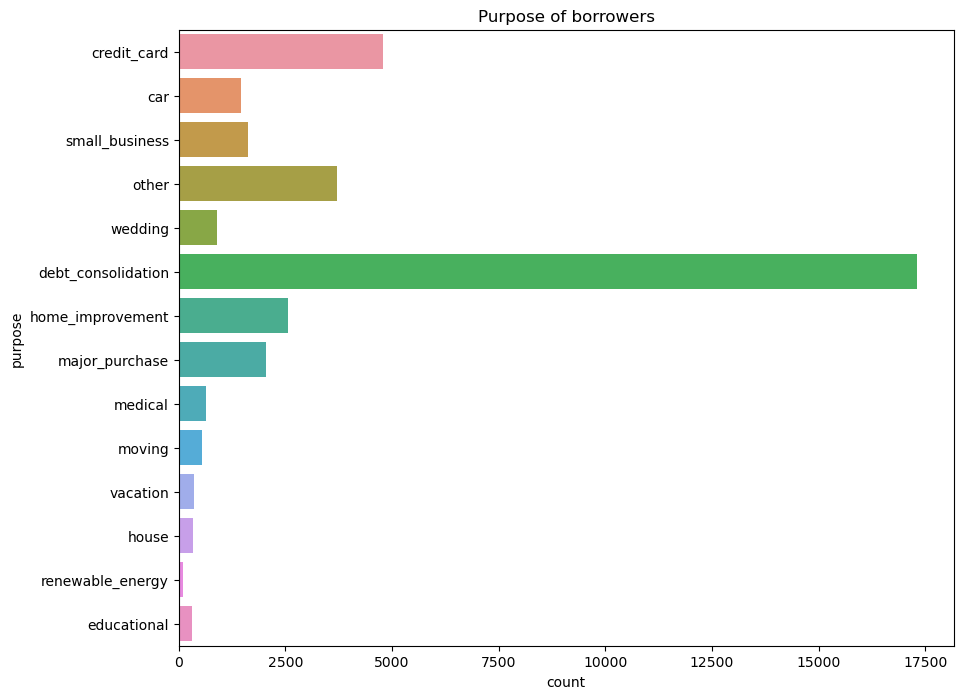

In [49]:
plt.figure(figsize=[10,8])
sns.countplot(y=df.purpose)
plt.title('Purpose of borrowers')
plt.show()

#### inference: maximum of the borrowers borrow for debt_consolidation

In [50]:
(df.verification_status.value_counts() *100/ df.verification_status.count())

Not Verified       44.415343
Verified           30.607846
Source Verified    24.976810
Name: verification_status, dtype: float64

#### inference: the verified status accounts for almost 55% whereas not verified is quite significant with 44%

Text(0.5, 1.0, 'distributiton of dti')

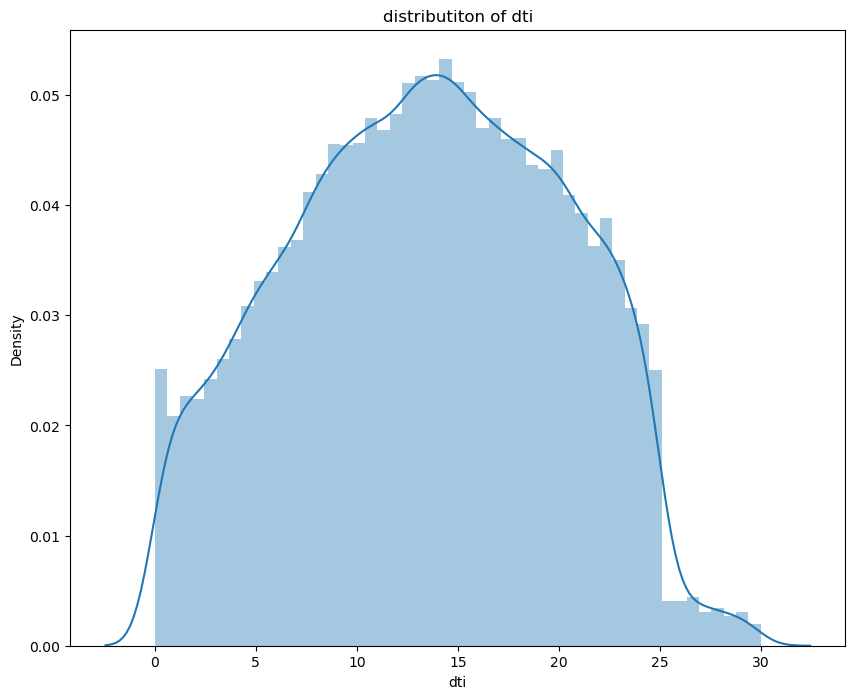

In [51]:
plt.figure(figsize=[10,8])
sns.distplot(df.dti)
plt.title('distributiton of dti')

#### inferene: dti indicated the debt to income ratio thus, it indicates that majority of borrowers have more debt to income. 15 is the highest ratio

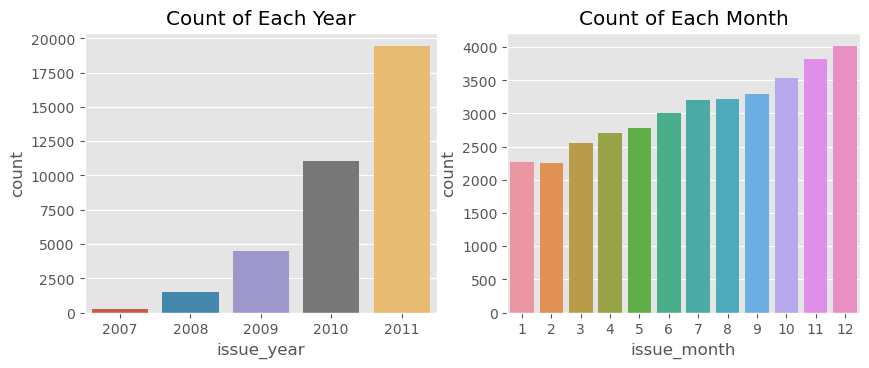

In [77]:
plt.figure(figsize=[10,8])http://localhost:8888/notebooks/Documents/upgrad%20course/Case%20Study/lending/Harsh_raj_poddar.ipynb#inferene:-dti-indicated-the-debt-to-income-ratio-thus,-it-indicates-that-majority-of-borrowers-have-more-debt-to-income.-15-is-the-highest-ratio
plt.subplot(221)
plt.title('Count of Each Year')
sns.countplot(df.issue_year)

plt.subplot(222)
plt.title('Count of Each Month')
sns.countplot(df.issue_month)
plt.show()
# plt.title('distributiton of dti')

#### inference: with each year , the lending of loans increases and also the lending of loan is more in last quarter of the year

# 

<font color='red' size="6"> Segmented Univariate Analysis </font>

In [53]:
df.head()

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,...,issue_d,loan_status,purpose,dti,earliest_cr_line,open_acc,pub_rec,total_acc,issue_year,issue_month
0,5000,4975.0,36,10.65,162.87,B,B2,10,RENT,24000.0,...,2011-12-01,0,credit_card,27.65,Jan-85,3,0,9,2011,12
1,2500,2500.0,60,15.27,59.83,C,C4,0,RENT,30000.0,...,2011-12-01,1,car,1.00,Apr-99,3,0,4,2011,12
2,2400,2400.0,36,15.96,84.33,C,C5,10,RENT,12252.0,...,2011-12-01,0,small_business,8.72,Nov-01,2,0,10,2011,12
3,10000,10000.0,36,13.49,339.31,C,C1,10,RENT,49200.0,...,2011-12-01,0,other,20.00,Feb-96,10,0,37,2011,12
5,5000,5000.0,36,7.90,156.46,A,A4,3,RENT,36000.0,...,2011-12-01,0,wedding,11.20,Nov-04,9,0,12,2011,12


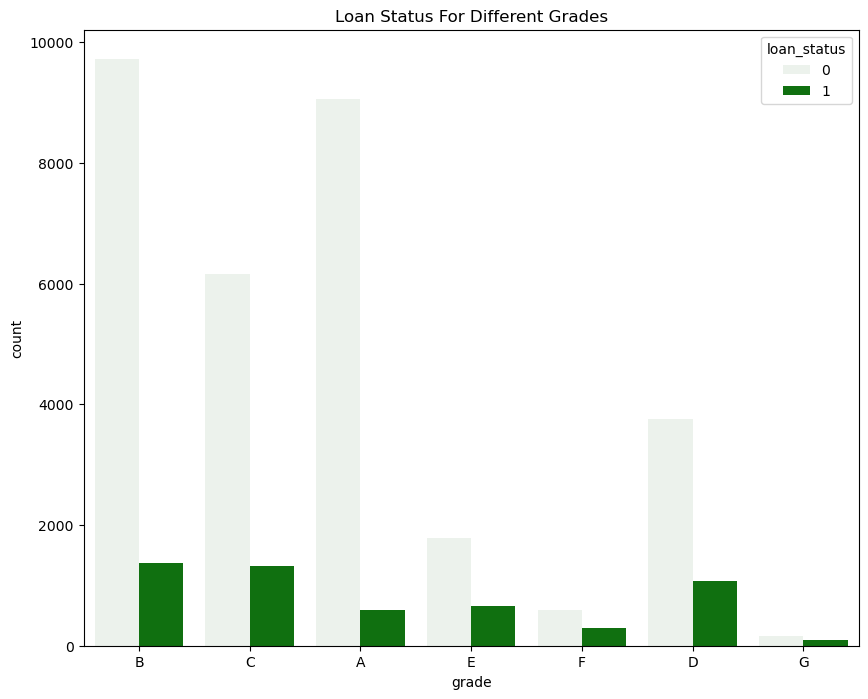

In [54]:
plt.figure(figsize=(10,8))
sns.countplot(data=df,x='grade',hue='loan_status', color='green')
plt.title('Loan Status For Different Grades')
plt.show()

#### inference: Grade B,C ,D have the most defaulters

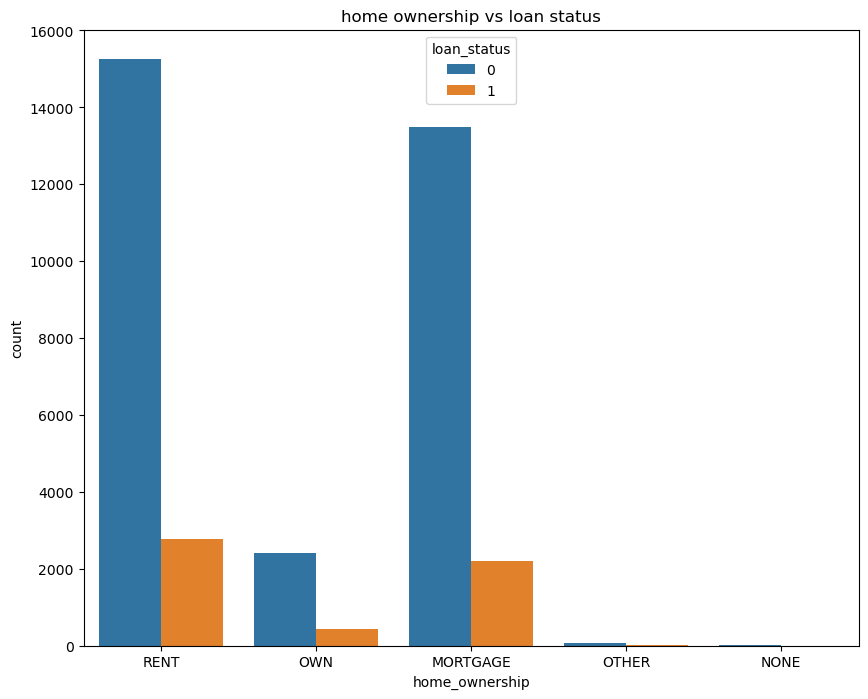

In [55]:
plt.figure(figsize=(10,8))
sns.countplot(data=df,x='home_ownership',hue='loan_status')
plt.title('home ownership vs loan status',fontsize=12)
plt.show()

#### inference: most of the defaulters either live in rent or mortgage

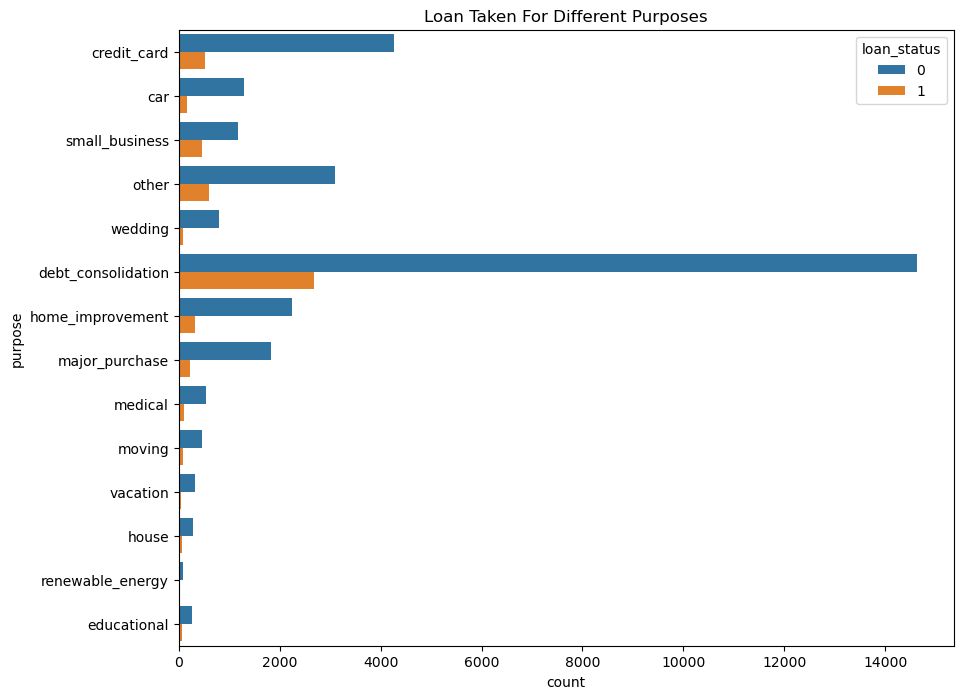

In [56]:
plt.figure(figsize=(10,8))
sns.countplot(data=df,y='purpose',hue='loan_status')
plt.title('Loan Taken For Different Purposes',fontsize=12)
plt.show()

#### inference: the purpose of debt_consolidation has the most number of defaulters

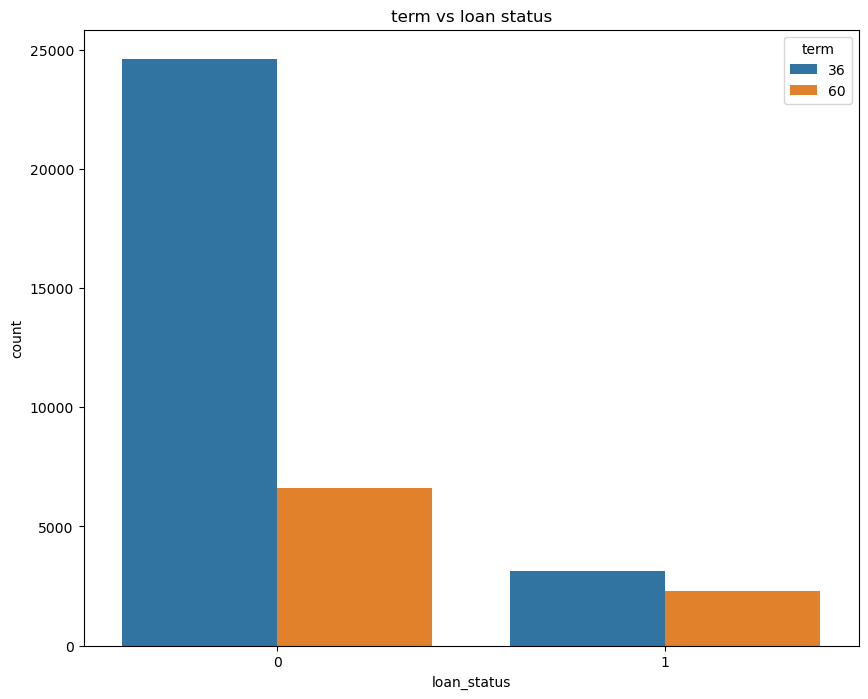

In [57]:
plt.figure(figsize=(10,8))
sns.countplot(data=df,x='loan_status',hue='term')
plt.title('term vs loan status',fontsize=12)
plt.show()

#### inference: The 60 month term has higher chance of defaulting than 36 month term whereas the 36 month term has higher chance of fully paid loan.

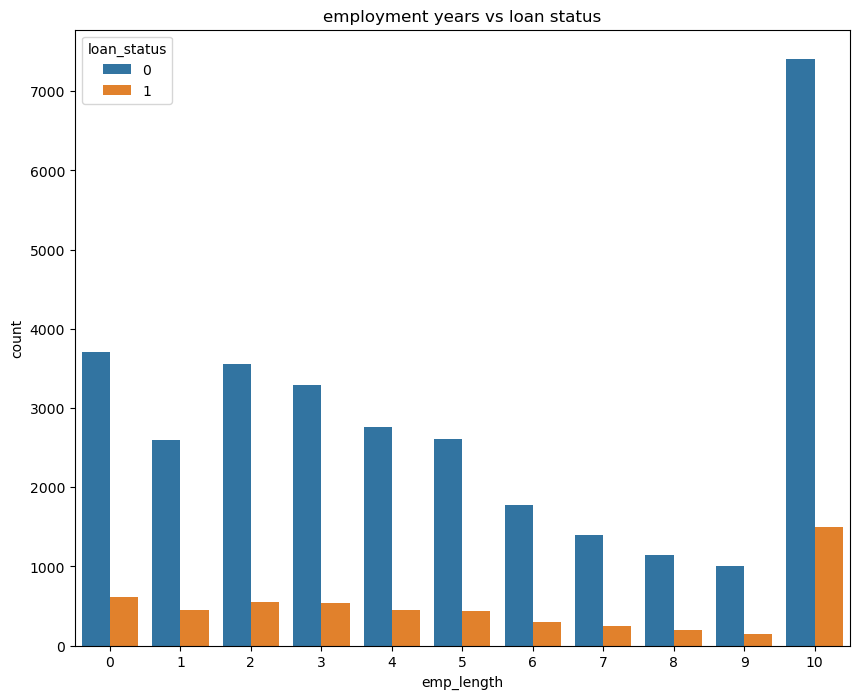

In [58]:
plt.figure(figsize=(10,8))
sns.countplot(data=df,x='emp_length',hue='loan_status')
plt.title('employment years vs loan status',fontsize=12)
plt.show()

#### inference: The Employees with 10 or 10+ years of experience are likely to default and have higher chance of fully paying the loan.

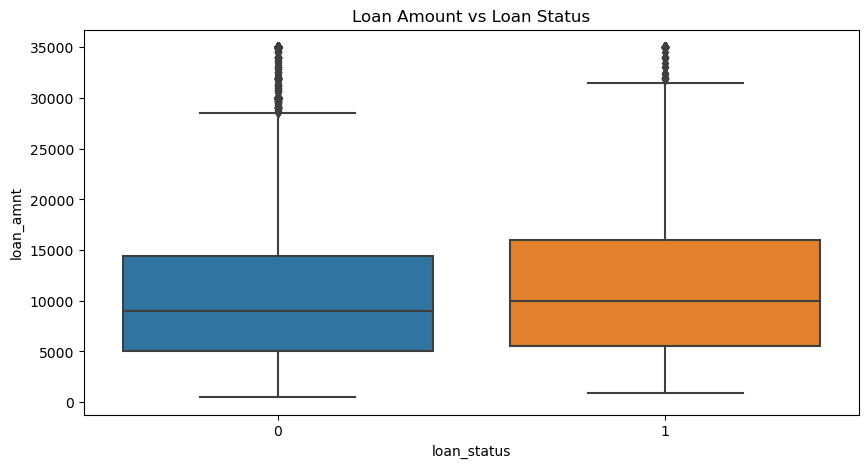

In [59]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df,y='loan_amnt',x='loan_status')
plt.title('Loan Amount vs Loan Status',fontsize=12)
plt.show()

#### inference: the the median is almost same for defaulters and fully paid but the 75th percentile is larger for defaulters meaning more loan increases the chances of defaulting

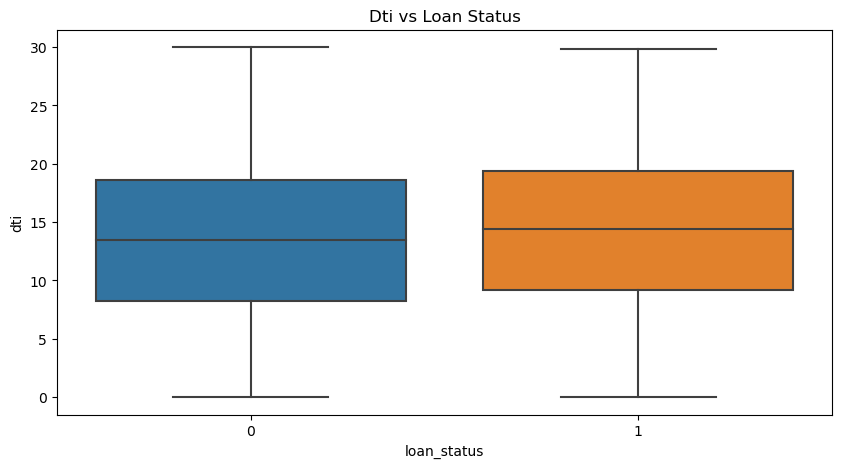

In [60]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df,y='dti',x='loan_status')
plt.title('Dti vs Loan Status',fontsize=12)
plt.show()

#### inference: the median of defaulters is slightly larger than fully paid. also the 75th percentile is larger meaning that more dti results to more defaulters 

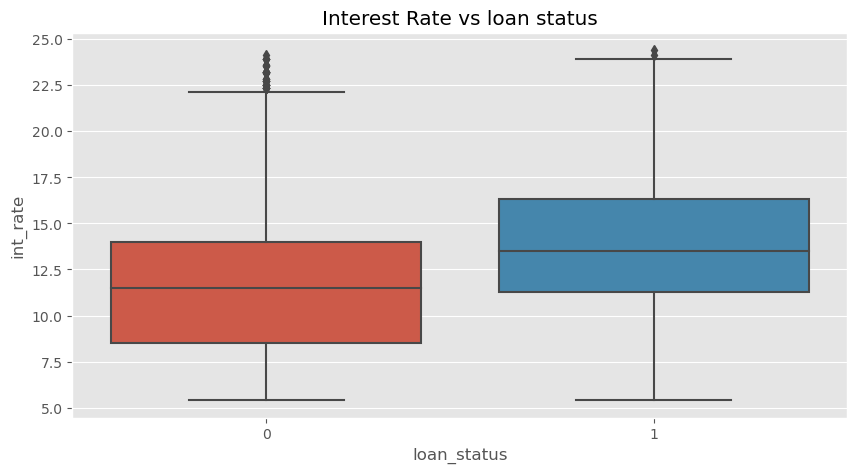

In [78]:
plt.figure(figsize=[10,5])
sns.boxplot(data = df, y ='int_rate', x='loan_status')
plt.title('Interest Rate vs loan status')
plt.show()

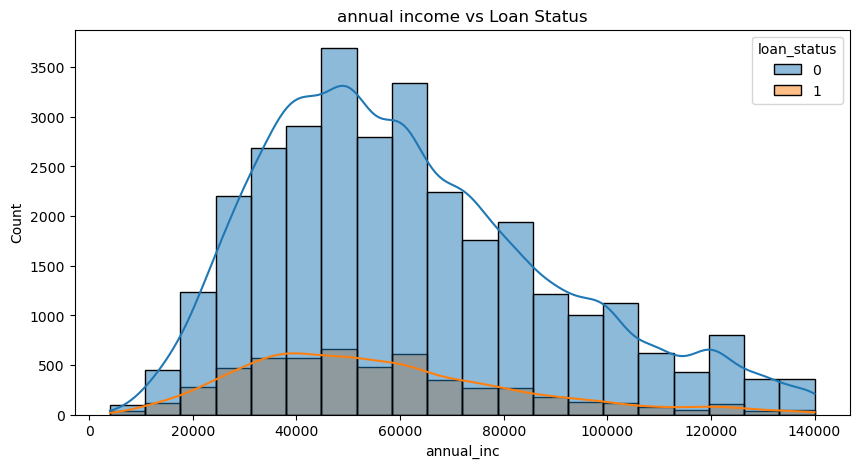

In [62]:
plt.figure(figsize=(10,5))
sns.histplot(data=df, x='annual_inc',hue='loan_status', bins=20, kde=True)
plt.title('annual income vs Loan Status',fontsize=12)
plt.show()

#### inference: the annual income of defulters are more between 20000 to 60000

# 

<font color='red' size="6">Bivariate Analysis </font>

In [63]:
df.head()

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,...,issue_d,loan_status,purpose,dti,earliest_cr_line,open_acc,pub_rec,total_acc,issue_year,issue_month
0,5000,4975.0,36,10.65,162.87,B,B2,10,RENT,24000.0,...,2011-12-01,0,credit_card,27.65,Jan-85,3,0,9,2011,12
1,2500,2500.0,60,15.27,59.83,C,C4,0,RENT,30000.0,...,2011-12-01,1,car,1.00,Apr-99,3,0,4,2011,12
2,2400,2400.0,36,15.96,84.33,C,C5,10,RENT,12252.0,...,2011-12-01,0,small_business,8.72,Nov-01,2,0,10,2011,12
3,10000,10000.0,36,13.49,339.31,C,C1,10,RENT,49200.0,...,2011-12-01,0,other,20.00,Feb-96,10,0,37,2011,12
5,5000,5000.0,36,7.90,156.46,A,A4,3,RENT,36000.0,...,2011-12-01,0,wedding,11.20,Nov-04,9,0,12,2011,12


## creating heat map between dti vs grade for loan status

<AxesSubplot:title={'center':'dti vs grade for loan status'}, xlabel='dti_Bucket', ylabel='grade'>

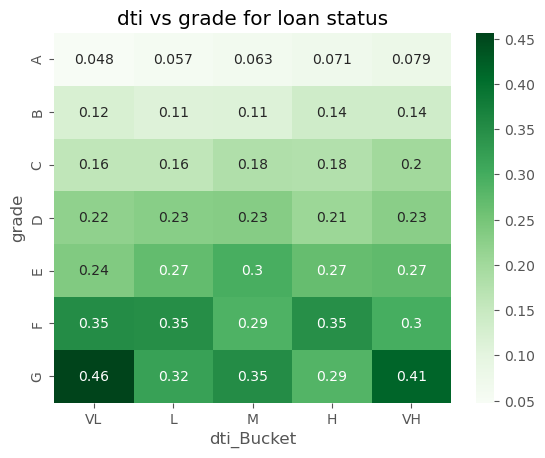

In [79]:
df['dti_Bucket']= pd.qcut(df.dti, [0,0.2,0.4,0.6,0.8,1],['VL','L','M','H','VH'])
res=pd.pivot_table(data=df, index='grade', columns='dti_Bucket', values='loan_status')
plt.title('dti vs grade for loan status')
sns.heatmap(res, cmap='Greens', annot=True)

#### terms like VL, L, M, H, VH indicates - Very low, Low, Medium, High, Very high

### Inference: for grade G, the correlation is high with Very low dti, indicating that the loans are low graded for low dti

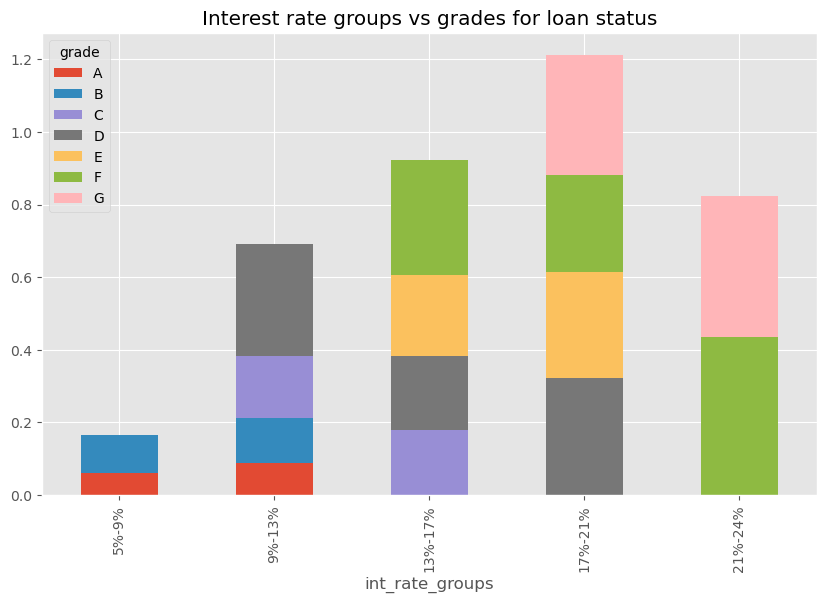

In [80]:
df['int_rate_groups'] = pd.cut(df['int_rate'], bins=5,precision =0,labels=['5%-9%','9%-13%','13%-17%','17%-21%','21%-24%'])
monthly= pd.pivot_table(data= df, index='int_rate_groups', columns='grade',values='loan_status')
monthly.plot(kind='bar', stacked='True', figsize=[10,6])
plt.title('Interest rate groups vs grades for loan status')
plt.show()

### inference: The lower grades like F,G are higher for high,very high interest rate indicating that for bad graded loans the interest rates are higher

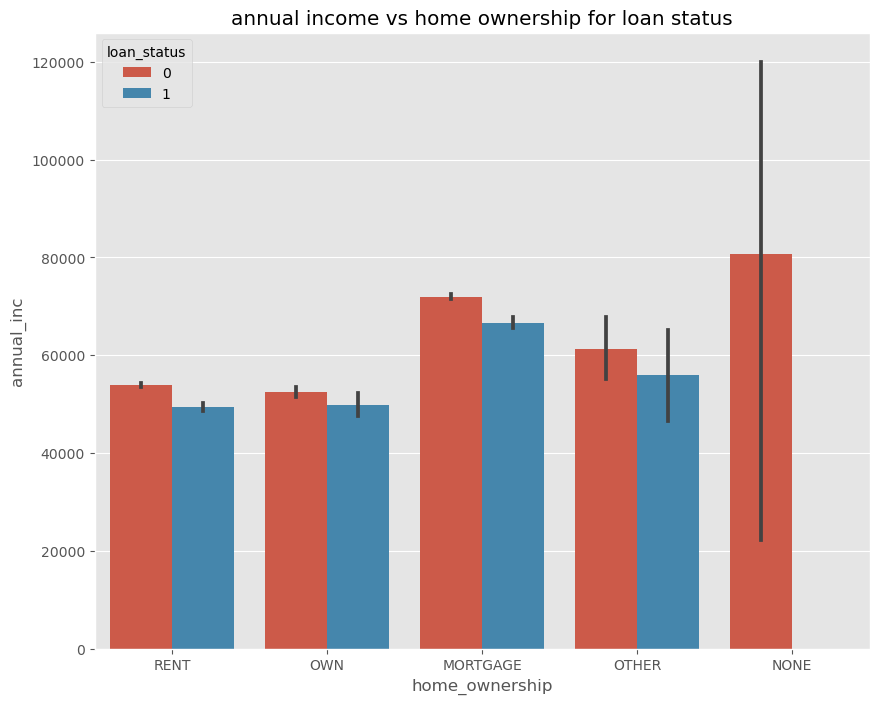

In [81]:
plt.figure(figsize=(10,8))
sns.barplot(data =df,x='home_ownership', y='annual_inc', hue ='loan_status')
plt.title('annual income vs home ownership for loan status')
plt.show()

### Inference: defaulters are more in case of mortgage 

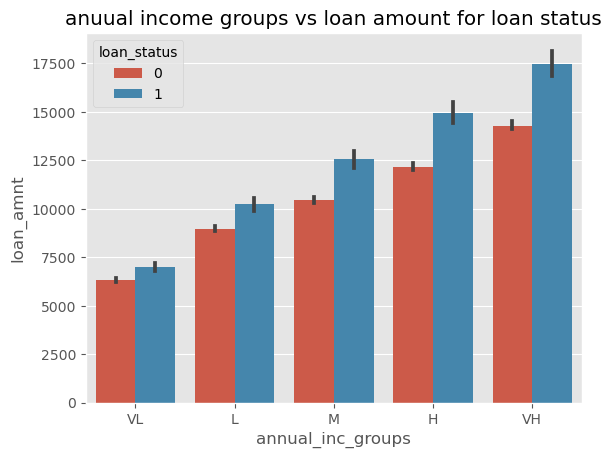

In [82]:
df['annual_inc_groups']= pd.qcut(df.annual_inc, [0,0.2,0.4,0.6,0.8,1],['VL','L','M','H','VH'])
sns.barplot(x = "annual_inc_groups", y = "loan_amnt", hue = 'loan_status', data = df)
plt.title('anuual income groups vs loan amount for loan status')
plt.show()

### Inference: Across all the income groups, the loan_amount is higher for people who defaulted.

<AxesSubplot:title={'center':'verification status vs loan amount for loan status'}, xlabel='verification_status', ylabel='loan_amnt'>

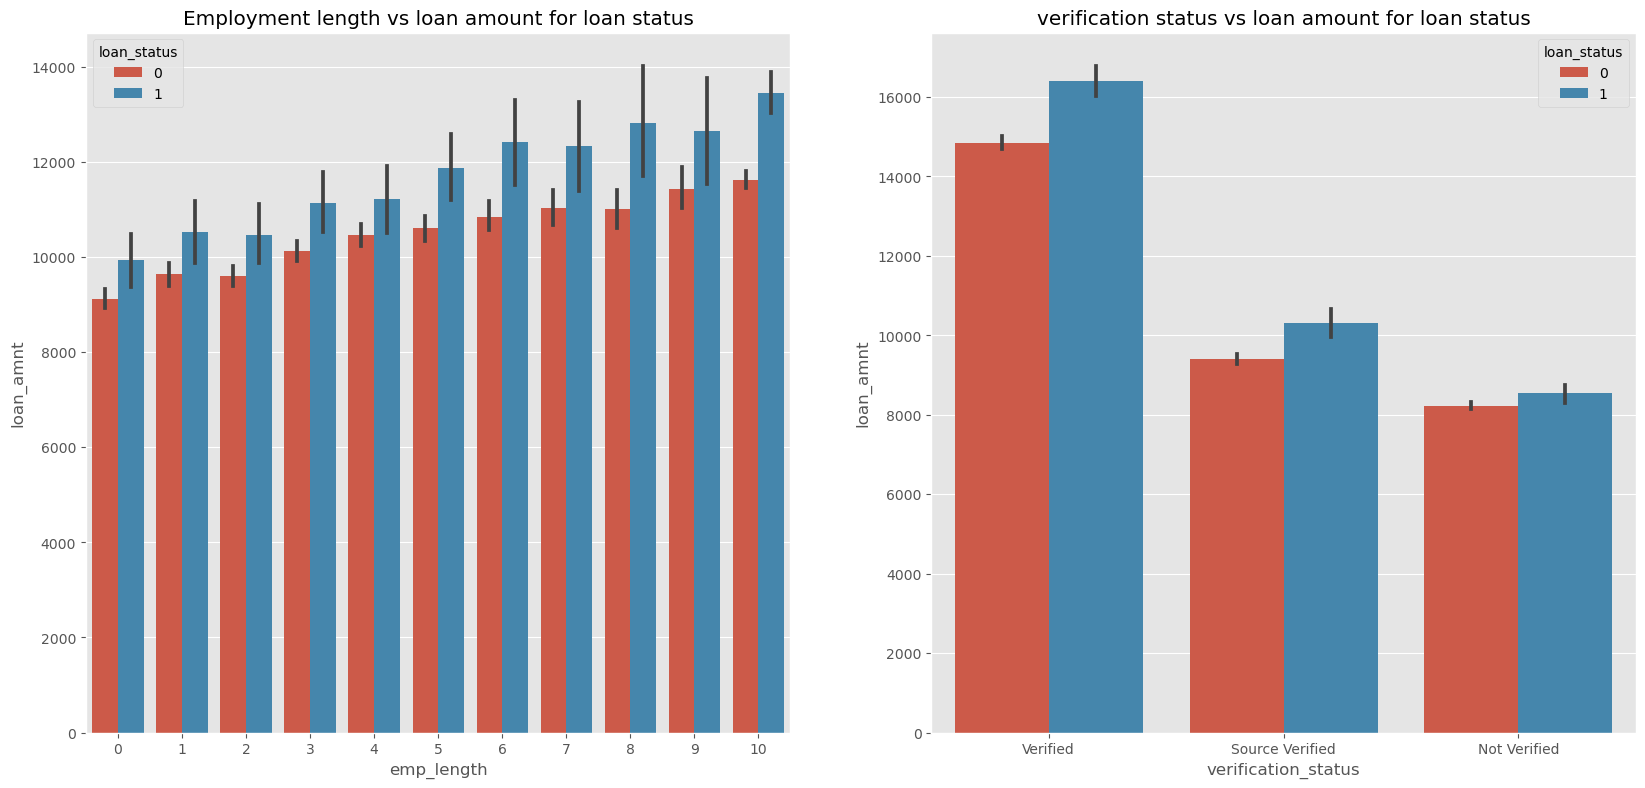

In [83]:
plt.style.use('ggplot')
plt.figure(figsize=(20,20))
plt.subplot(221)
plt.title('Employment length vs loan amount for loan status')
sns.barplot(data =df,y='loan_amnt', x='emp_length', hue ='loan_status')
plt.subplot(222)
plt.title('verification status vs loan amount for loan status')
sns.barplot(data =df,y='loan_amnt', x='verification_status', hue ='loan_status')

### inference: Employees with longer working history got the loan approved for a higher amount.
### Looking at the verification status data, verified loan applications tend to have higher loan amount. 


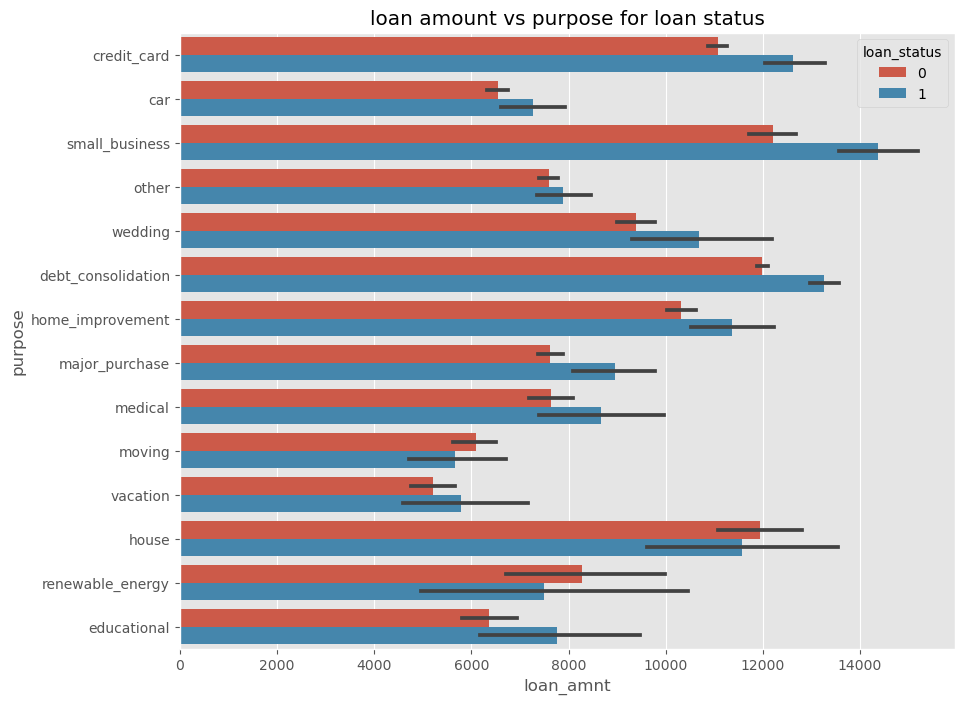

In [84]:
plt.figure(figsize=(10,8))
sns.barplot(data =df,x='loan_amnt', y='purpose', hue ='loan_status')
plt.title('loan amount vs purpose for loan status')
plt.show()

#### inference: defaulters are high for small businesses.

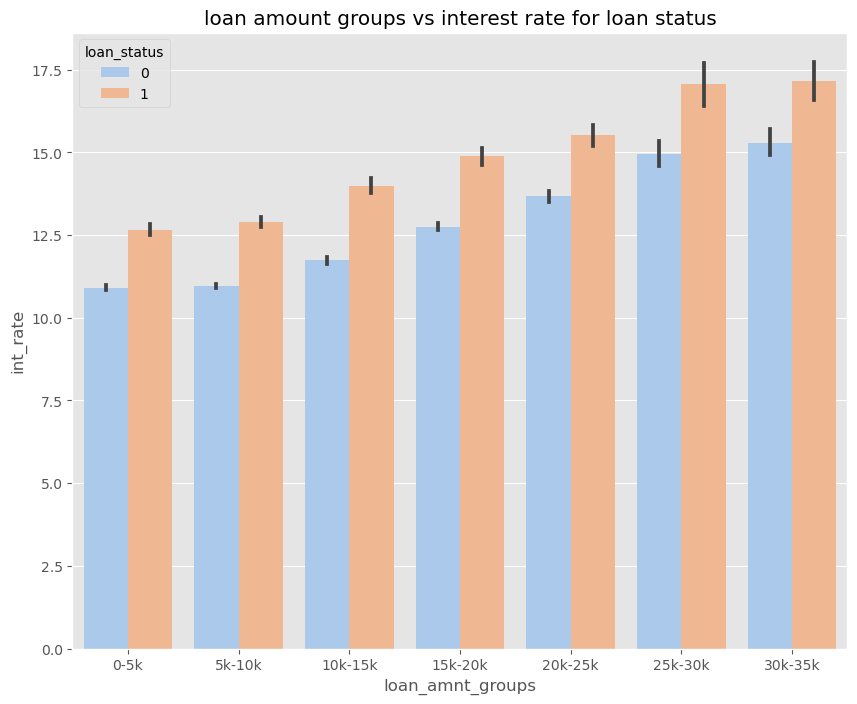

In [85]:
df['loan_amnt_groups'] = pd.cut(df['loan_amnt'], bins=7,precision =0,labels=['0-5k','5k-10k','10k-15k','15k-20k','20k-25k','25k-30k','30k-35k'])

plt.figure(figsize=(10,8))
plt.title('loan amount groups vs interest rate for loan status')
sns.barplot(data =df,x='loan_amnt_groups', y='int_rate', hue ='loan_status',palette="pastel")
plt.show()

#### inference: the default rate is the most for loan amount 25k to 35k.

In [71]:
df1 =df.corr()

In [72]:
df1

,loan_amnt,funded_amnt_inv,term,int_rate,installment,emp_length,annual_inc,loan_status,dti,open_acc,pub_rec,total_acc,issue_year,issue_month
loan_amnt,1.000000,0.936925,0.349710,0.291189,0.931481,0.131722,0.403197,0.066771,0.090313,0.166234,-0.044106,0.239080,0.105214,0.049984
funded_amnt_inv,0.936925,1.000000,0.348494,0.288787,0.902641,0.144569,0.382429,0.044927,0.097070,0.151745,-0.046327,0.226394,0.249812,0.066358
term,0.349710,0.348494,1.000000,0.435568,0.091776,0.100791,0.080212,0.176107,0.078732,0.043481,0.013050,0.092423,0.234482,0.031771
int_rate,0.291189,0.288787,0.435568,1.000000,0.269193,-0.014069,0.054022,0.212342,0.111683,-0.007917,0.103767,-0.064017,0.034866,0.025095
installment,0.931481,0.902641,0.091776,0.269193,1.000000,0.103221,0.398193,0.033557,0.079392,0.160925,-0.040177,0.212378,0.048062,0.027053
emp_length,0.131722,0.144569,0.100791,-0.014069,0.103221,1.000000,0.160975,0.025403,0.052969,0.085878,0.074471,0.198821,0.133762,0.022343
annual_inc,0.403197,0.382429,0.080212,0.054022,0.398193,0.160975,1.000000,-0.066246,-0.072641,0.265207,-0.008935,0.386628,0.038862,0.013762
loan_status,0.066771,0.044927,0.176107,0.212342,0.033557,0.025403,-0.066246,1.000000,0.041203,-0.006753,0.051534,-0.019201,0.026902,0.025395
dti,0.090313,0.097070,0.078732,0.111683,0.079392,0.052969,-0.072641,0.041203,1.000000,0.298322,-0.006893,0.245853,0.092832,0.016215
open_acc,0.166234,0.151745,0.043481,-0.007917,0.160925,0.085878,0.265207,-0.006753,0.298322,1.000000,0.005308,0.684071,0.010129,0.001970


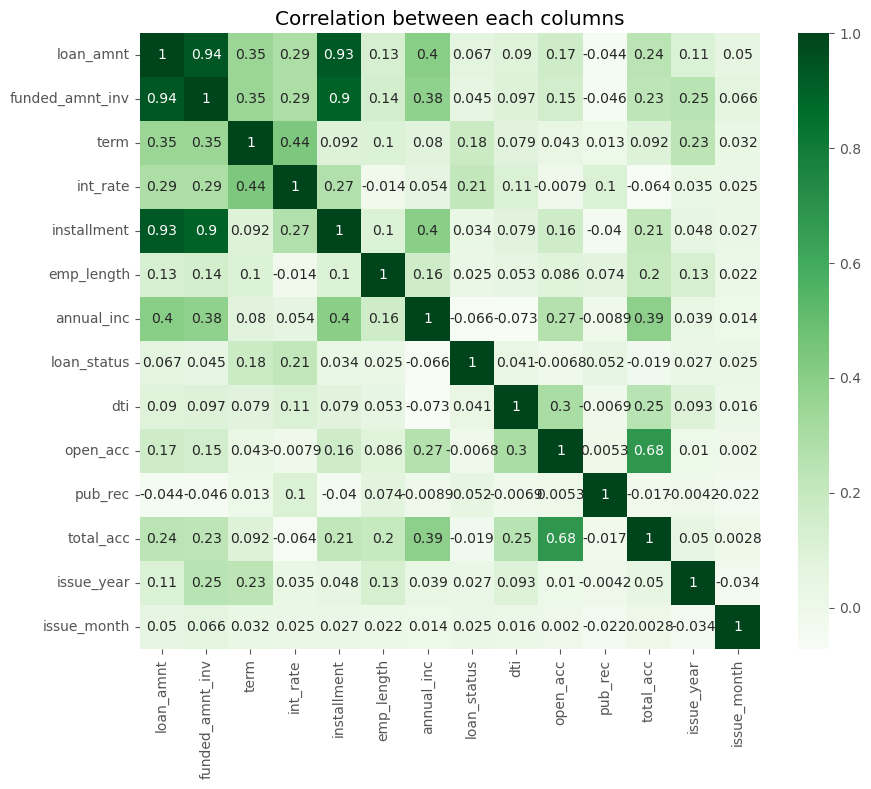

In [86]:
plt.figure(figsize=(10,8))
sns.heatmap(data=df1, cmap='Greens', annot=True)
plt.title('Correlation between each columns')
plt.show()

<font color='red' size="6">Insights </font>

## Univariate Analysis

* The number of defaulted loan is 6 times less than the number of fully paid loan.
* The 36 month term is 3 times more than 60 months. meaning people generally take loans for shorter duration
* The interest rate is more crowded around 6-8 and 10-15.
* A large amount of loans are with grade 'A' and 'B' compared to rest showing most loans are high grade loans. 
* Majority of borrowers have working experience greater than 10 years.
* Majority of borrowers don't posses property and are on mortgage or rent.
* About 50% of the borrowers are verified by the company or have source verified.
* A large percentage of loans are taken for debt consolidation followed by credit card.
* dti indicated the debt to income ratio thus, it indicates that majority of borrowers have more debt to income. 15 is the highest ratio
* Majority of the loans are given in last quarter of the year.
* The number of loans approved increases with the time at expontential rate, thus we can say that the loan approval rate is increasing with the time.

### Segmented Univariate Analysis
* Grade B, C ,D have the most defaulters
* Debt Consolidation is the most popular loan purpose and has highest number of fully paid loan and defaulted loan.
* The 60 month term has higher chance of defaulting than 36 month term whereas the 36 month term has higher chance of fully paid loan.
* most of the defaulters either live in rent or mortgage.
* more loan amount increases the chances of defaulting.
* The 75th percentile of defaulters is slightly larger than fully paid meaning that more dti results to more defaulters.
* The Fully paid loan are increasing exponentially with the time compared to defaulted loan.
* The default loan amount increases with interest rate.
* The Employees with 10+ years of experience are likely to default and have higher chance of fully paying the loan.

### Bivariate Analysis
* The loans are low graded for low dti.
* The Grade A which is lowest risk also has lowest DTI ratio which we can say that higher grade has lower rate of default.
* Interest rate vs grade for loan status indicates that for bad graded loans the interest rates are higher.
* Across all the income groups, the loan_amount is higher for people who defaulted.
* Employees with longer working history got the loan approved for a higher amount.
* Looking at the verification status data, verified loan applications tend to have higher loan amount.

#### Major Driving factor which can be used to predict the chance of defaulting and avoiding Credit Loss:
* Annual income
* DTI
* Grades
* Verification Status

##### There is a more probability of defaulting when :
* Applicants taking loan for 'Debt Consolidation'.
* Applicants whose home ownership is 'MORTGAGE'
* Applicants who receive interest at the rate of 21-24% 
* Applicants who have taken a loan in the range 30k - 35k and are charged interest rate of 15-17.5 %
* Applicants who have taken a loan for small business.
* When grade is F and loan amount is between 15k-20k
* When employment length is 10yrs or more.
* For grade G and interest rate above 20%.